WNixalo

2018/2/11 17:51

[Homework No.1](https://github.com/fastai/numerical-linear-algebra/blob/master/nbs/Homework%201.ipynb)

In [81]:
%matplotlib inline

import numpy as np
import torch as pt
import matplotlib.pyplot as plt

plt.style.use('seaborn')

## 1.

---

1. Consider the polynomial $p(x) = (x-2)^9 = x^9 - 18x^8 + 144x^7 - 672x^6 + 2016x^5 - 4032x^4 + 5376x^3 - 4608x^2 + 2304x - 512$

  a. Plot $p(x)$ for $x=1.920,\,1.921,\,1.922,\ldots,2.080$ evaluating $p$ via its coefficients $1,\,,-18,\,144,\ldots$

  b. Plot the same plot again, now evaluating $p$ via the expression $(x-2)^9$.

  c. Explain the difference.
  
  *(The numpy method linspace will be useful for this)*

In [84]:
def p(x, mode=0):
    if mode == 0:
        return x**9 - 18*x**8 + 144*x**7 - 672*x**6 + 2016*x**5 - 4032*x**4 + 5376*x**3 - 4608*x**2 + 2304*x - 512
    else:
        return (x-2)**9

WNx: *wait, what does it mean to evaluate a function by its coefficients? How is that different than just evaluating it?*

--> *does she mean to ignore the exponents? Because that would make* ***b.*** make more sense.. I .. think.*

In [16]:
# Signature: np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
np.linspace(1.92, 2.08, num=161)
# np.arange(1.92, 2.08, 0.001)

array([1.92 , 1.921, 1.922, 1.923, 1.924, 1.925, 1.926, 1.927, 1.928,
       1.929, 1.93 , 1.931, 1.932, 1.933, 1.934, 1.935, 1.936, 1.937,
       1.938, 1.939, 1.94 , 1.941, 1.942, 1.943, 1.944, 1.945, 1.946,
       1.947, 1.948, 1.949, 1.95 , 1.951, 1.952, 1.953, 1.954, 1.955,
       1.956, 1.957, 1.958, 1.959, 1.96 , 1.961, 1.962, 1.963, 1.964,
       1.965, 1.966, 1.967, 1.968, 1.969, 1.97 , 1.971, 1.972, 1.973,
       1.974, 1.975, 1.976, 1.977, 1.978, 1.979, 1.98 , 1.981, 1.982,
       1.983, 1.984, 1.985, 1.986, 1.987, 1.988, 1.989, 1.99 , 1.991,
       1.992, 1.993, 1.994, 1.995, 1.996, 1.997, 1.998, 1.999, 2.   ,
       2.001, 2.002, 2.003, 2.004, 2.005, 2.006, 2.007, 2.008, 2.009,
       2.01 , 2.011, 2.012, 2.013, 2.014, 2.015, 2.016, 2.017, 2.018,
       2.019, 2.02 , 2.021, 2.022, 2.023, 2.024, 2.025, 2.026, 2.027,
       2.028, 2.029, 2.03 , 2.031, 2.032, 2.033, 2.034, 2.035, 2.036,
       2.037, 2.038, 2.039, 2.04 , 2.041, 2.042, 2.043, 2.044, 2.045,
       2.046, 2.047,

In [25]:
start = 1.92
stop  = 2.08
num   = int((stop-start)/0.001 + 1) # =161

In [26]:
x = np.linspace(start, stop, num)

In [97]:
def p_cœf(x):
    return x - 18*x + 144*x - 672*x + 2016*x - 4032*x + 5376*x - 4608*x + 2304*x - 512
def p_cœf_alt(x):
    return p(x,0)
def p_ex9(x):
    return p(x,1)

WNx: *huh.. this is a thing.* 

```Init signature: np.vectorize(pyfunc, otypes=None, doc=None, excluded=None, cache=False, signature=None)```

In [98]:
vec_pcf     = np.vectorize(p_cœf)
vec_pcf_alt = np.vectorize(p_cœf_alt)
vec_px9     = np.vectorize(p_ex9)

In [99]:
y_cf     = vec_pcf(x)
y_cf_alt = vec_pcf_alt(x)
y_x9     = vec_px9(x)
y        = p(x)

**a**, **b**:

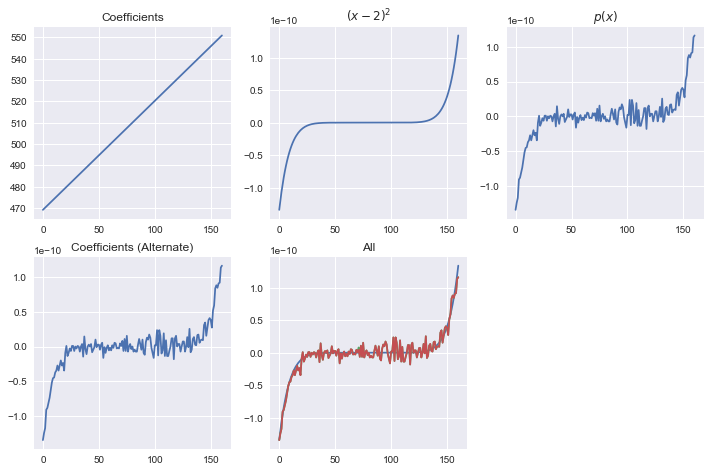

In [100]:
fig = plt.figure(1, figsize=(12,12))

ax = fig.add_subplot(3,3,1)
ax.set_title('Coefficients')
ax.plot(y_cf)

ax = fig.add_subplot(3,3,2)
ax.set_title('$(x - 2)^2$')
ax.plot(y_x9)

ax = fig.add_subplot(3,3,3)
ax.set_title('$p(x)$')
ax.plot(y)

ax = fig.add_subplot(3,3,4)
ax.set_title('Coefficients (Alternate)')
ax.plot(y_cf_alt)

ax = fig.add_subplot(3,3,5)
ax.set_title('All')
# ax.plot(y_cf)
ax.plot(y_x9)
ax.plot(y_cf_alt)
ax.plot(y);

WNx: *I think my original interpretation of what "evaluate p by its coefficients" meant was wrong, so I'm leaving it out of the final "All" plot, it just drowns everything else out.*

**c:**

WNx: $p(x) = (x-2)^9$ is the 'general' version of the Coefficient interpretation of $p$. It captures the overall trend of $p$ without all the detail. Kind of an average -- gives you the overall picture of what's going on. For instance you'd compresss signal $p$ to its $(x-2)^9$ form, instead of saving its full coeff form.

## 2.

---

2\. How many different double-precision numbers are there?  Express your answer using powers of 2


WNx: $2^{64} - (2^{53} - 2^0$) for IEEE 754 64-bit Double. See: [Quora Link](https://www.quora.com/How-many-distinct-numbers-can-be-represented-as-double-precision)

## 3.

---

3\. Using the updated [Numbers Every Programmer Should Know](https://people.eecs.berkeley.edu/~rcs/research/interactive_latency.html), how much longer does a main memory reference take than an L1 cache look-up?  How much longer does a disk seek take than a main memory reference?

In [101]:
3e-3/1e-7

30000.000000000004

Main memory reference takes **100x** longer than an L1 cache lookup.

Disk seek takes **30,000x** longer than a main memory reference.

L1 cache: `1e-9`s.

MMRef: `1e-7`s.

DS: `3e-3`s

## 4.

---

4\. From the Halide Video, what are 4 ways to traverse a 2d array?

WNx:

**Scanline Order**: Sequentially in Y, within that: Sequentially in X. (row-maj walk)

(or): Transpose X&Y and do a Column-Major Traversal. (walk down cols first)

**Serial Y, Vectorize X by n**: walk down x in increments (vectors)

**Parallel Y, Vectorize X by n**: distribute scanlines into parallel threads

Split X & Y by tiles (**Tile-Traversal**). Split X by n, Y by n. Serial Y_outer, Serial X_outer, Serial Y_inner, Serial X_inner

See: [Halide Video section](https://youtu.be/3uiEyEKji0M?t=318)

## 5.

---

5\. Using the animations --- ([source](https://www.youtube.com/watch?v=3uiEyEKji0M)), explain what the benefits and pitfalls of each approach. Green squares indicate that a value is being read; red indicates a value is being written. Your answers should be longer in length (give more detail) than just two words.

WNx:

1) Parallelizable across scanlines. Entire input computed before output computation. \ Poor Locality. 

Loading is slow and limited by system memory bandwidth. By the time the `blurred in y` stage goes to read some intermediate data, it's probably been evicted from cache.

2) Parallelizable across scanlines. Locality. \ Redundant Computation. 

Each point in `blurred in x` is recomputed 3 times.

3) Locality & No redundant computation. \ Serial Dependence --> Poor Parallelism.

Introduction of a serial dependence in the scanlines of the output. Relying on having to compute scanline `N-1` before computing scanline `N`. We ca

## 6.

---

6\. Prove that if $A = Q B Q^T$ for some orthogonal matrix $Q$, the $A$ and $B$ have the same singular values.

Orthogonal Matrix: $Q^TQ = QQ^T = I \iff Q^T = Q^{-1}$

So.. if you put matrix $B$ in between $Q$ and $Q^T$, what your doing is performing a transformation on $B$ and then performing the inverse of that transformation on it. ie: Returning $B$ to what it was originally. $\Rightarrow$ if $B$ is ultimately unchanged and $A=QBQ^T$ then $A=B$ (or at least same sing.vals?) This -- seems to me -- an inherent property of the orthogonal matrix $Q$.

**edit**: ahhh, Singluar Values are not just the values of a matrix. Like Eigen Values, they tell something special about it [Mathematics StackEx link](https://math.stackexchange.com/questions/127500/what-is-the-difference-between-singular-value-and-eigenvalue)

In [105]:
### some tests:

# Q is I
Q = np.eye(3)
A = np.random.randint(-10,10,(3,3))

In [106]:
A

array([[-7,  9, -4],
       [-1,  9,  8],
       [-4, -7, -7]])

In [107]:
Q@A@Q.T

array([[-7.,  9., -4.],
       [-1.,  9.,  8.],
       [-4., -7., -7.]])

In [110]:
# random orthogonal matrix Q
# ref: https://stackoverflow.com/a/38426572
from scipy.stats import ortho_group

Q = ortho_group.rvs(dim=3)

WNx: gonna have to do SVD to find the singular values of $A$. Then make a matrix $B$ st. $A=QBQ^T$. *Then* check that A.σ == B.σ. [C.Mellon U. page on SVD](https://www.cs.cmu.edu/~venkatg/teaching/CStheory-infoage/book-chapter-4.pdf)

From the [Lesson 2 notebook](https://github.com/fastai/numerical-linear-algebra/blob/master/nbs/2.%20Topic%20Modeling%20with%20NMF%20and%20SVD.ipynb), I think I'll start with $B$ and compute $A$ acc. to the eqn, then check σ's of both.

Aha. So `σ` is `s` is `S`. The diagonal matrix of singular values. Everyone's using different names for the same thing. *bastards*.

In [126]:
# setting A & B
B = np.random.randint(-100,100,(3,3))
A = Q@B@Q.T

In [129]:
Ua, sa, Va = np.linalg.svd(A, full_matrices=False)
Ub, sb, Vb = np.linalg.svd(B, full_matrices=False)

In [130]:
# sa & sb are the singular values of A and B
np.isclose(sa, sb)

array([ True,  True,  True])

In [131]:
sa, sb

(array([152.37085729,  79.12862975,  40.85072584]),
 array([152.37085729,  79.12862975,  40.85072584]))

Woohoo!

## 7.

---

7\. What is the *stochastic* part of *stochastic gradient descent*?

WNx:

*Stochastic* refers to computing the gradient on random mini-batches of the input data.